# Passbands

[Gaia Passbands](https://www.cosmos.esa.int/web/gaia/edr3-passbands)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# gaia pass bands
pb_path = '/home/kevin/repos/ReipurthBallyProject/data/GaiaEDR3_passbands_zeropoints_version2/passband.dat'
cols = ['lmbda', 'Gpb', 'e_Gpb', 'BPpb', 'e_BBpb', 'RPpb', 'e_RPpb']
gaia_pb = pd.read_csv(pb_path, sep = '\s+', names = cols, na_values=99.99)

In [8]:
gaia_pb.head()

,lmbda,Gpb,e_Gpb,BPpb,e_BBpb,RPpb,e_RPpb
0,320.0,2.373670e-08,2.341033e-11,NaN,NaN,NaN,NaN
1,321.0,1.577744e-07,1.540369e-10,NaN,NaN,NaN,NaN
2,322.0,9.085548e-07,8.780532e-10,NaN,NaN,NaN,NaN
3,323.0,4.780723e-06,4.573254e-09,NaN,NaN,NaN,NaN
4,324.0,2.394281e-05,2.266986e-08,NaN,NaN,NaN,NaN


In [9]:
wsg = pd.read_csv('https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/static/files/scla/gSuprime.fil',
                  sep='\s+', names=['lmbda', 'gpb'])
# nm not angstroms
wsg.lmbda /= 10

wsz = pd.read_csv('https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/static/files/scla/zSuprime.fil',
                  sep='\s+', names=['lmbda', 'zpb'])
wsz.lmbda /= 10

w_c_ic = pd.read_csv('https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/static/files/scla/ISuprime.fil',
                      sep='\s+', names=['lmbda', 'icpb'])
w_c_ic.lmbda /= 10


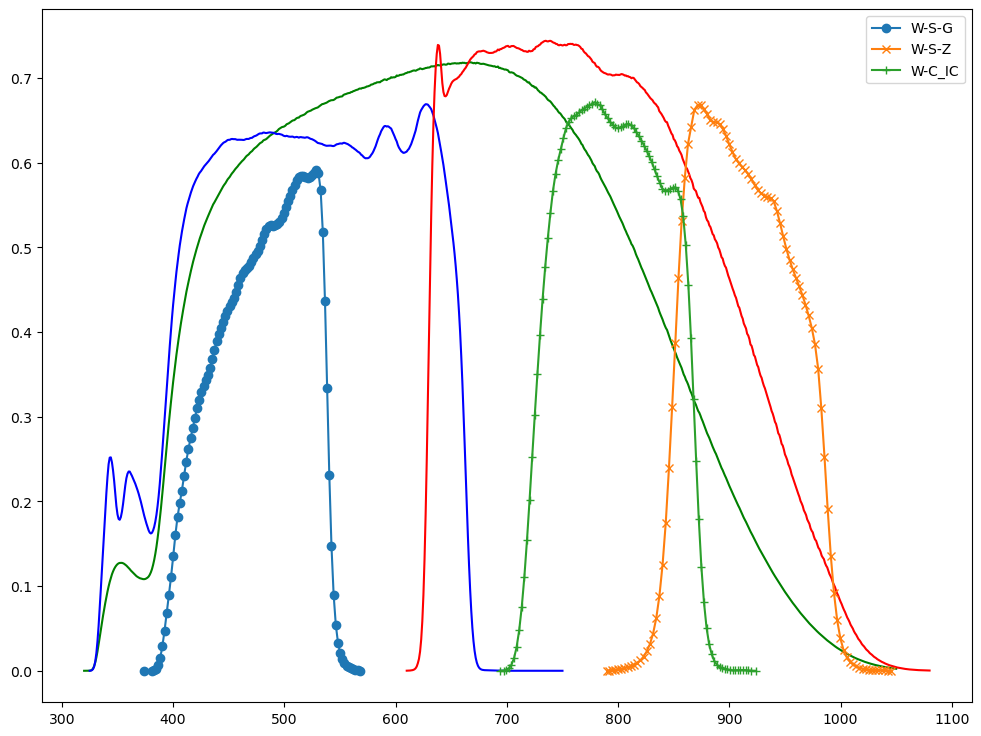

In [10]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(gaia_pb.lmbda, gaia_pb.Gpb, color='green')
ax.plot(gaia_pb.lmbda, gaia_pb.BPpb, color='blue')
ax.plot(gaia_pb.lmbda, gaia_pb.RPpb, color='red')
ax.plot(wsg.lmbda, wsg.gpb, marker='o', label='W-S-G')
ax.plot(wsz.lmbda, wsz.zpb, marker='x', label='W-S-Z')
ax.plot(w_c_ic.lmbda, w_c_ic.icpb, marker='+', label='W-C_IC')
ax.legend()

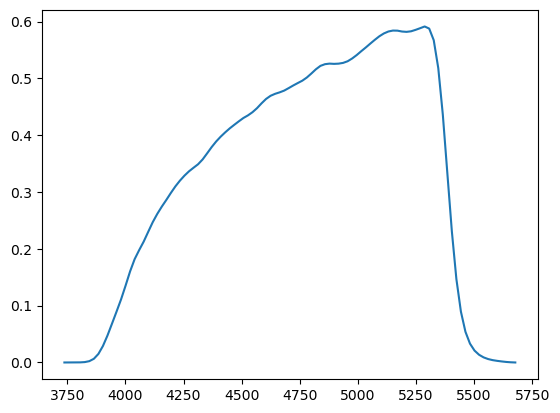

In [18]:
plt.plot(wsg.lmbda, wsg.gpb)

In [1]:
import speclite
sdss=speclite.filters.load_filters('sdss2010-*')
speclite.filters.plot_filters(sdss, wavelength_limits=(3000, 110000))


AttributeError: module 'speclite' has no attribute 'filters'

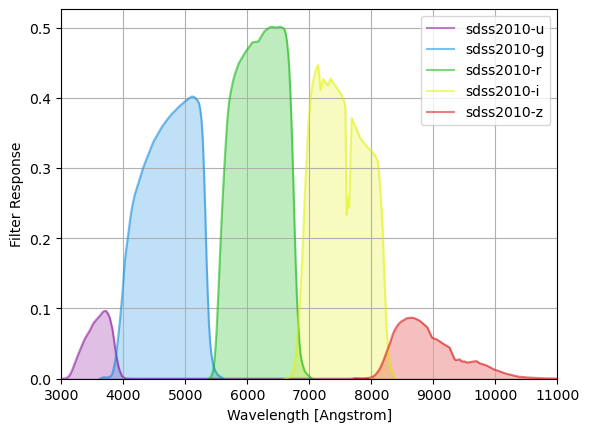

In [33]:
import speclite.filters
sdss=speclite.filters.load_filters('sdss2010-*')
speclite.filters.plot_filters(sdss, wavelength_limits=(3000, 11000))

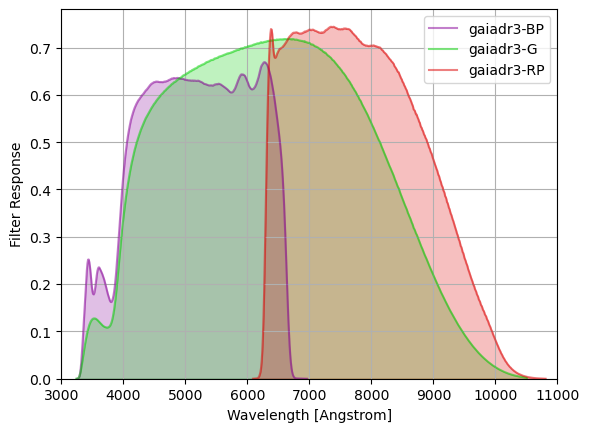

In [32]:
gaia = speclite.filters.load_filters('gaiadr3-*')
speclite.filters.plot_filters(gaia, wavelength_limits=(3000, 11000))

In [25]:
combined = speclite.filters.load_filters('gaiadr3-RP', 'sdss2010-i', 'sdss2010-z')

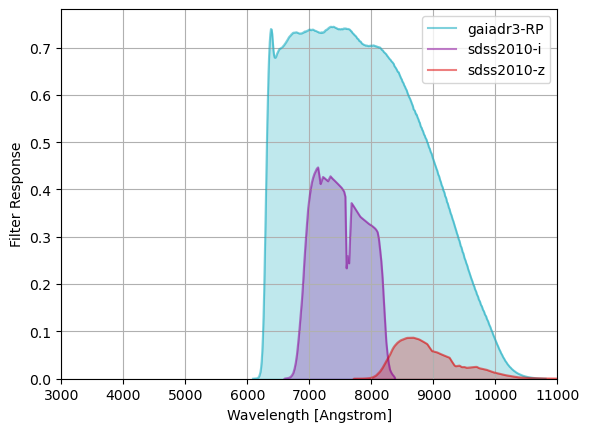

In [26]:
speclite.filters.plot_filters(combined, wavelength_limits=(3000, 11000))

In [27]:
gaia_rp = speclite.filters.load_filter('gaiadr3-RP')

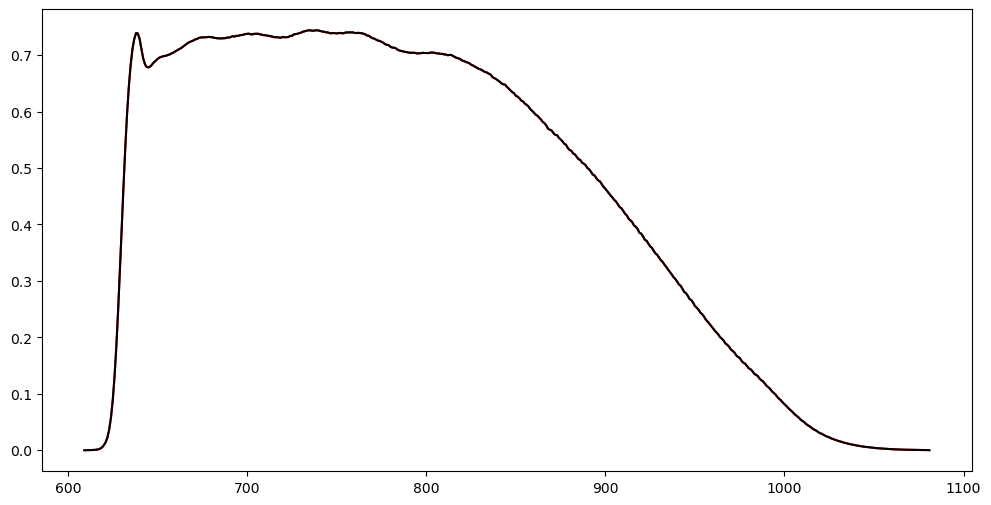

In [62]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(gaia_pb.lmbda, gaia_pb.RPpb, color='red')
ax.plot(gaia_rp.wavelength/10, gaia_rp.response, color='Black')

In [56]:
#johnson-cousins boadband filters
jc_filters = ['B', 'V', 'R', 'I']

jc_filters_raw={}
for f in jc_filters:
    filterurl = f'https://subarutelescope.org/Observing/Instruments/SCam/txt/{f}.txt'
    jc_filters_raw[f]= pd.read_csv(filterurl, sep='\s+', names=['lmbda',f'{f}_transmissivity'])


In [51]:
gaia[0].name

'gaiadr3-BP'

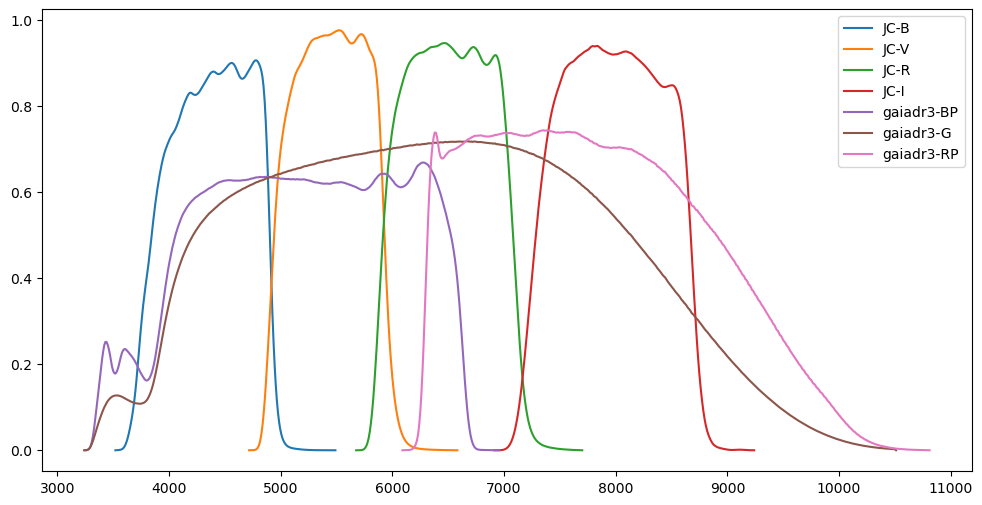

In [57]:
fig, ax = plt.subplots(figsize=(12,6))
for f in jc_filters:
    ax.plot(jc_filters_raw[f].lmbda, jc_filters_raw[f][f'{f}_transmissivity'], label=f'JC-{f}')
for f in gaia:
    ax.plot(f.wavelength, f.response, label=f.name)

ax.legend()

In [60]:
#johnson-cousins boadband filters
sdss_filters = ['g', 'r', 'i', 'z']

sdss_filters_raw={}
for f in sdss_filters:
    filterurl = f'https://subarutelescope.org/Observing/Instruments/SCam/txt/{f}.txt'
    sdss_filters_raw[f]= pd.read_csv(filterurl, sep='\s+', names=['lmbda',f'{f}_transmissivity'])

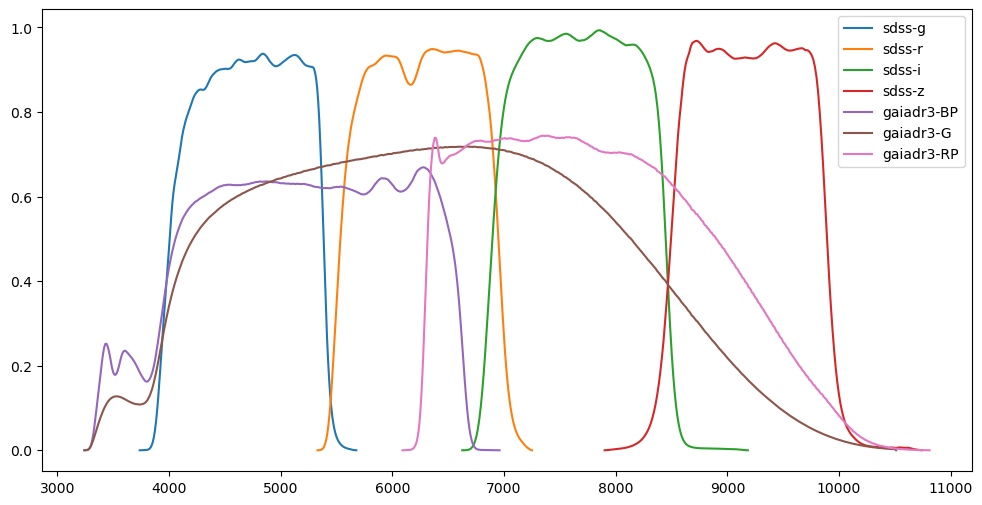

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
for f in sdss_filters:
    ax.plot(sdss_filters_raw[f].lmbda, sdss_filters_raw[f][f'{f}_transmissivity'], label=f'sdss-{f}')
for f in gaia:
    ax.plot(f.wavelength, f.response, label=f.name)

ax.legend()

In [63]:
speclite.filters.filter_group_names

['sdss2010',
 'sdss2010noatm',
 'decam2014',
 'wise2010',
 'hsc2017',
 'lsst2016',
 'lsst2023',
 'bessell',
 'BASS',
 'MzLS',
 'Euclid',
 'decamDR1',
 'decamDR1noatm',
 'gaiadr2',
 'gaiadr3',
 'twomass',
 'galex',
 'odin',
 'suprime',
 'cfht_megacam']

In [64]:
suprime = speclite.filters.load_filters('suprime-*')

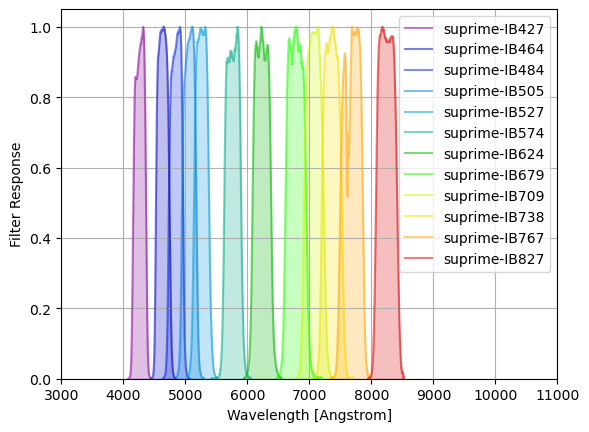

In [66]:
speclite.filters.plot_filters(suprime, wavelength_limits=(3000, 11000))

In [72]:
sdss_filters_raw={}
for f in sdss_filters:
    filterurl = f'https://subarutelescope.org/Observing/Instruments/SCam/txt/{f}.txt'
    sdss_filters_raw[f]= pd.read_csv(filterurl, sep='\s+', names=['lmbda',f'{f}_transmissivity'])

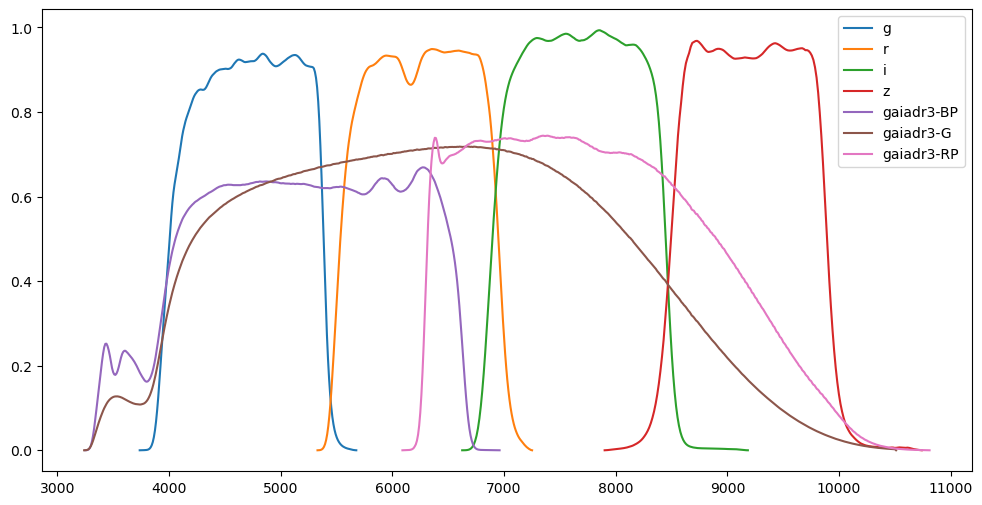

In [73]:
fig, ax = plt.subplots(figsize=(12,6))
for f in sdss_filters_raw:
    ax.plot(sdss_filters_raw[f].lmbda, sdss_filters_raw[f][f'{f}_transmissivity'], label=f)
for f in gaia:
    ax.plot(f.wavelength, f.response, label=f.name)

ax.legend()

In [70]:
subaru_nb = ['NA656', 'NB711', 'NB816', 'NB921']
subaru_nb_filters_raw={}
for f in subaru_nb:
    filterurl = f'https://subarutelescope.org/Observing/Instruments/SCam/txt/{f}.txt'
    subaru_nb_filters_raw[f]= pd.read_csv(filterurl, sep='\s+', names=['lmbda',f'{f}_transmissivity'])

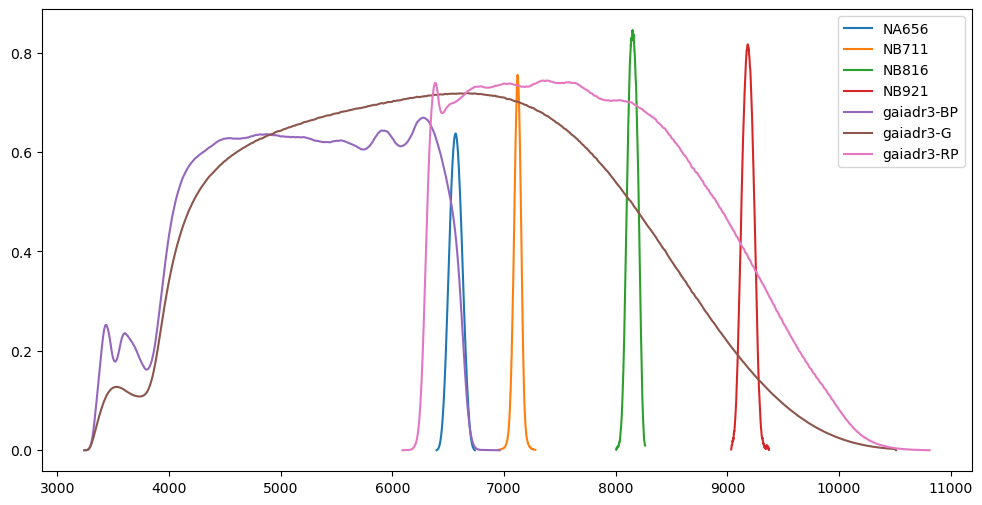

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
for f in subaru_nb_filters_raw:
    ax.plot(subaru_nb_filters_raw[f].lmbda, subaru_nb_filters_raw[f][f'{f}_transmissivity'], label=f)
for f in gaia:
    ax.plot(f.wavelength, f.response, label=f.name)

ax.legend()